In [41]:
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib.mlab as mlab
from astropy.io import fits
import pylab as pl
import os
import matplotlib.lines as mlines
% matplotlib inline

In [42]:
# Function developed to find the index of values in the most populated bin of 2D histogram (Developed by Graham)
def find_index(x_val, y_val, x_range, y_range, x_ind, y_ind):
    xmin=x_range[x_ind]
    xmax=x_range[x_ind+1]
    ymin=y_range[y_ind]
    ymax=y_range[y_ind+1]
    x_true=np.where(np.logical_and(x_val>=xmin,x_val<xmax))[0]
    y_true=np.where(np.logical_and(y_val>=ymin, y_val<ymax))[0]
    true_indicies=[i for i in x_true if i in y_true]
    return true_indicies #Returns the indicies for the 2MASSID 

In [43]:
# Upload files that have infinity values extracted
DR13_R,DR13_xr = np.loadtxt('DR13_Rmin_XR_Max.lis',usecols=[2,4], skiprows=1,unpack=True, dtype=float)
DR13_massID = np.loadtxt('DR13_Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[1])
DR13_field = np.loadtxt('DR13_Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[0])

In [90]:
x=np.where(np.logical_and(DR13_xr>= 68.0 , DR13_R <= 12.0))
fs = DR13_field[x]
ms = DR13_massID[x]
xrs=DR13_xr[x]
Rvals=DR13_R[x]
outage = open('Refined_DR13_Potential_Binaries.csv', 'w')
for i in range(len(fs)):
    #print(DR13_massID[x])
    outage.write(str(fs[i]) + ',' +str(ms[i])+','+str(xrs[i])+',' +str(Rvals[i])+'\n')
outage.close()
print(len(DR13_massID[x]))

15701


In [87]:
# Finding the mode of the potential binary list
occurances ={}
for i in xrs:
    try:
        occurances[i]+= 1
    except(KeyError):
            occurances[i] = 1
print(occurances)

{215.25: 3, 112.5: 1, 114.09: 2, 183.22999999999999: 1, 213.06999999999999: 1, 209.47: 1, 249.28: 1, 230.53: 1, 207.68000000000001: 1, 215.41999999999999: 2, 186.62: 1, 265.81999999999999: 1, 233.90000000000001: 1, 73.0: 1, 74.0: 1, 79.0: 1, 80.0: 1, 308.48000000000002: 1, 85.0: 1, 95.0: 1, 82.790000000000006: 1, 103.0: 1, 104.0: 1, 110.0: 1, 112.0: 1, 113.0: 2, 118.0: 1, 87.329999999999998: 1, 124.0: 1, 128.0: 1, 71.75: 1, 138.0: 1, 139.0: 1, 146.0: 1, 150.0: 2, 129.97: 2, 127.81: 1, 155.0: 2, 157.0: 1, 158.0: 1, 161.0: 1, 151.03: 2, 76.930000000000007: 1, 173.0: 1, 106.23999999999999: 1, 175.0: 1, 176.0: 1, 177.0: 1, 181.0: 1, 163.83000000000001: 1, 163.94999999999999: 3, 274.81999999999999: 1, 235.12: 1, 188.0: 1, 93.920000000000002: 1, 213.03999999999999: 1, 191.0: 2, 194.0: 2, 196.0: 1, 133.36000000000001: 1, 200.0: 1, 204.0: 1, 86.150000000000006: 1, 206.0: 1, 191.97999999999999: 1, 209.0: 2, 210.0: 1, 211.0: 1, 212.0: 1, 213.0: 2, 214.0: 1, 215.0: 2, 217.0: 1, 219.0: 1, 221.0: 1

The algorithm found [77, 132, 728, 1001, 1116, 1361, 1504, 1597, 1686, 1687, 2265, 2733, 2792, 3028, 3464, 3729, 4020, 4065, 4097, 4120, 4277, 4432, 4457, 4610, 4733, 5104, 5342, 5587, 5605, 5698, 5942, 6123, 6199, 6378, 6698, 6705, 9083, 9435, 9932, 11223, 11330, 11535, 11541, 11924, 12788, 13109, 13335, 13376, 13404, 13460, 13569, 13612, 13622, 13623, 13884, 14172, 14261, 14330, 14369, 14449, 14663, 15307, 15549] indicies
['2M00110648+6609349' '2M00192309+6719245' '2M00454469+4151594'
 '2M02062016+6436319' '2M02443508+0828498' '2M03244083+6216165'
 '2M03320675+4519114' '2M03371271+7115148' '2M03421288+3257371'
 '2M03421355+4954547' '2M04370256+2800402' '2M05201669+4400087'
 '2M05235436+3420262' '2M05342625-0422162' '2M05372381+2247009'
 '2M05482272+1102406' '2M06055198+0953553' '2M06073731+3134393'
 '2M06085720+1128561' '2M06100286+2644016' '2M06152408+0945329'
 '2M06212029-0113146' '2M06221685-0129374' '2M06302922+0419566'
 '2M06340474-3138217' '2M06451912+0913489' '2M06515890+19210

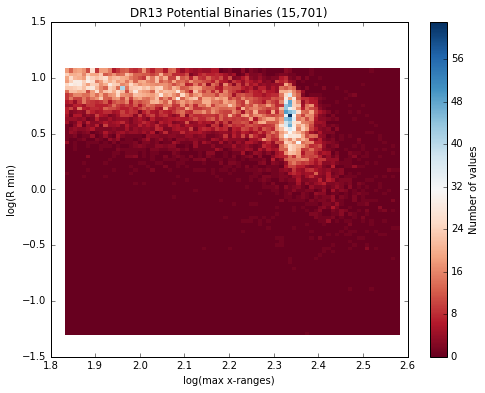

In [95]:
# Plotting the list that satisfied the binary behavior signatures (high x-range and low R min values)
x_vals, y_vals = np.loadtxt('Refined_DR13_Potential_Binaries.csv',delimiter=',',usecols=[2,3],unpack=True, dtype=float)
xval=[]
Rval=[]
for i in range(len(x_vals)):
    #xval.append(math.log10(x_vals[i]))
    xval.append(math.log10(x_vals[i]))
    #Rval.append(math.log10(y_vals[i]))
    Rval.append(math.log10(y_vals[i]))
    
percentBin = 0.005
BinCount = int(percentBin*len(xval))
Grid, x_ranges, y_ranges = np.histogram2d(xval, Rval, bins=BinCount, range=None, normed=False, weights=None)

Grid = np.rot90(Grid)
Grid = np.flipud(Grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(x_ranges, y_ranges,Grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('DR13 Potential Binaries (15,701)')
plt.savefig('Refined DR13 Potential Binaries (15,701).jpg', bbox_inches='tight')

MaxGrid  = np.argmax(Grid)#Returns the indices of the maximum values along an axis
t1 = MaxGrid%Grid.shape[0]
t2 = MaxGrid/Grid.shape[0]
# Reports the index in the large appended list where the star is located along with its associated max x-range & R min
found_indicies=find_index(xval, Rval, x_ranges, y_ranges, t1, t2)

print("The algorithm found {0} indicies".format(found_indicies)) 
# Prints the associated 2MASSID and fields with the found indicies
print(ms[found_indicies])
print(fs[found_indicies])
#Print associated max x-range values
print(xrs[found_indicies])
#Print associated R min values 
print(Rvals[found_indicies])

#Writing a file to hold the information for most populated bins
revfield = fs[found_indicies]
revmass = ms[found_indicies]
revx = xrs[found_indicies]
revr = Rvals[found_indicies]

outs = open('DR13 PB Populated Bins.lis','w')
for i in range(len(revfield)):
    outs.write(str(revfield[i])+ '\t'+str(revmass[i])+'\t'+str(revx[i])+'\t'+str(revr[i])+'\n')
outs.close()


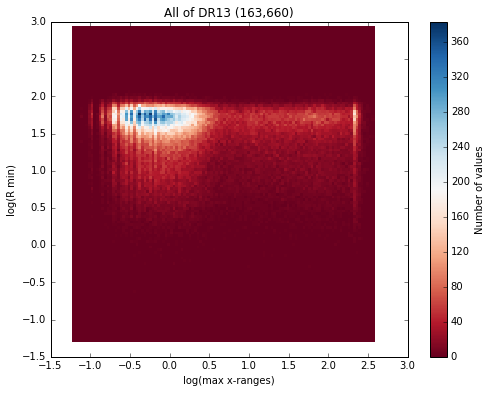

In [99]:
outfile = open('DR13_Log_Values_for_60,456_Stars.csv','w')
xmax=[]
R=[]
for i in range(len(DR13_xr)):
    xmax.append(math.log10(DR13_xr[i]))
    R.append(math.log10(DR13_R[i]))
    outfile.write(str(xmax[i])+'\t'+str(R[i])+'\n')     
outfile.close()

#print [x_max for x_max in xmax if not math.isnan(x_max)]
#print [Rmin for Rmin in R if not math.isnan(Rmin)]
#xmax.remove(xmax[4859]) # Remove the associated max x-ranges from the list to keep consistant sizes
#xmax.remove(xmax[5450])
#xmax.remove(xmax[4859])
#xmax.remove(xmax[5450])
#xmax.remove(xmax[31200])
#xmax.remove(xmax[121925])
#xmax.remove(xmax[139596])
#xmax.remove(xmax[147090])
#xmax.remove(xmax[147255])
#xmax.remove(xmax[159955])
#x_max = np.array(xmax)
#Rmin = [Rmin for Rmin in R if not math.isinf(Rmin)] # Remove the inf values from the list
#print(Rmin)
#Locating the indexes of the corresponding x-maxs to the inf Rmin values
#indexes = [i for i,Rmin in enumerate(Rmin) if Rmin == math.isinf(Rmin)] 
#print(indexes)
#print(len(x_max))
#print(len(Rmin))

perceBin = 0.0007
binCount = int(perceBin*len(x_max))
grid, x_range, y_range = np.histogram2d(x_max, R, bins=binCount, range=None, normed=False, weights=None)

grid = np.rot90(grid)
grid = np.flipud(grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(x_range, y_range,grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('All of DR13 (163,660)')
plt.savefig('All of DR13 .jpg', bbox_inches='tight')

max_grid  = np.argmax(grid)#Returns the indices of the maximum values along an axix
ta = max_grid%grid.shape[0]
tb = max_grid/grid.shape[0]
# Reports the index in the large appended list where the star is located along with its associated max x-range & R min
found_index=find_index(x_max, Rmin, x_range, y_range, tb, ta)

#print("The algorithm found {0} indicies".format(found_index)) 
# Prints the associated 2MASSID with the found indicies
#print(DR13_massID[found_index])


In [86]:
# Function for generating tables for each star that has a representative visit
def TableGenerator(header, matrix,top_format, left_format, cell_format, row_delim, col_delim):
    #zip is a built in function thar returns a list of tuples where each one is the ith element from each argument 
    #sequence.
    table = [[''] + header] + [[name] + row for name, row in zip(header, matrix)] 
    #making the format suited for the parameters specifically.
    table_format = [len(header)*[top_format]] + len(matrix)*[[left_format] + len(header)*[cell_format]]
    #format is a built in that returns a string 
    col_widths = [max(len(format.format(cell, 0))
                     for format, cell in zip(col_format, col))
                  #Finding the column length in the list of tuples for a combined list of tuples
                  for col_format, col in zip(zip(*table_format), zip(*table))]
    #returning the values into a table that will present data vertically
    return row_delim.join(col_delim.join(format.format(cell, width) #Joins the columns and rows together
            for format, cell, width in zip(row_format, row, col_widths)) #Formatting the width of each column
              for row_format, row in zip(table_format, table))#Formatting the row of each entry



outfile2 = open('DR13_Tables.csv','w')
for i in range(len(x_max)):
    table = TableGenerator(['Field', '2MASSID ', 'log(max_xr)', 'log(R_min)','max_xr','R_min'],
                          [[DR13_field[i]], [DR13_massID[i]], ['%.3f'%x_max[i]], ['%.3f'%Rmin[i]],[DR13_xr[i]],[DR13_R[i]]],
                    '\n', '{:<{}}', '{:>{}}','\n', '  ')
    outfile2.write(table)
outfile2.close()